## Processing of atmospheric data: STAZIONE A
***
**Gruppo 2**: Chiara Ventrucci - Federica Benassi

In [ ]:
install.packages('dplyr')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


### Lettura dei dati

In [ ]:
# ===========================================================
# = LABORATORY OF DATA PROCESSING AND EVALUATION =
# = Measured Wind Speed and Wind Direction =
# = Benassi Federica & Ventrucci Chiara =
# ===========================================================

# Clean variables previously defined
rm(list=ls())

# READING DATA ==============================================
# Define the working directory

#setwd("/Data")

# Define the input filenames and assign them to a variable
letter = 'A'
StationDataFile <- paste0("StationData_",letter,".txt")

# Read data as a table and assigning to the variable called 'StationData'
StationData <- read.table(file(paste0('Data/', StationDataFile)),
                          sep = "", # separate columns by space
                          na.string = NA, # tag empty values as "NA"
                          as.is = TRUE, # convert character to factors
                          header = FALSE, # ignore the header
                          skip = 1, # skip the first row
                          col.names = c("Date","Time","Interval",
                                        "Press","inTemp","outTemp",
                                        "inHum","outHum","wndSpeed",
                                        "wndDir","windGust","wGstDir",
                                        "rainRate","rain","dewpoint",
                                        "wdChill","heatIndx","ET",
                                        "totRad","UV")
                            )

cat('Dimension of the matrix = ', dim(StationData))

# DATE FORMAT ===============================================
# Define 1st and 2nd columns as a String and split into 5 columns
Temp <- t(rbind(as.numeric(substr(StationData[,1],1,4)), # year
          as.numeric(substr(StationData[,1],5,6)), # month
          as.numeric(substr(StationData[,1],7,8)), # day
          floor(StationData[,2]), # hour
          round(100*(StationData[,2] %%1)) # minutes
          ))

# Define names to rows and columns
colnames(Temp) <- c("Year","Month","Day","Hour","Minutes")
rownames(Temp) <- 1:dim(Temp)[1]

# Replace the new date format (2 cols > 5 cols) and keep only the WindRose variables
StationData <- cbind(Temp, StationData[,9:10])

# Record the length of data
#LenSD <- dim(StationData)[1]

#StationData[1:6,]

#cat("Available Data for Station A:", LenSD)


Dimension of the matrix =  264347 20

### Selezione del periodo

In [ ]:
### FIRST PERIOD: 2015-2016 ###

FirstPeriod = dplyr::filter(StationData, StationData$Year == 2015 | StationData$Year == 2016 )

Winter_15_16 = dplyr::filter(FirstPeriod, (FirstPeriod$Year == 2015 & FirstPeriod$Month == 12 & FirstPeriod$Day >= 1)
                        | (FirstPeriod$Year == 2016 & (FirstPeriod$Month == 1 | FirstPeriod$Month == 2) )) 

Spring_16 = dplyr::filter(FirstPeriod, (FirstPeriod$Year == 2016 & FirstPeriod$Month == 3 & FirstPeriod$Day >= 1)
                        | (FirstPeriod$Year == 2016 & (FirstPeriod$Month == 4 | FirstPeriod$Month == 5) ) )

### SECOND PERIOD: 2016-2017 ###

SecondPeriod = dplyr::filter(StationData, StationData$Year == 2016 | StationData$Year == 2017 )
Winter_16_17 = dplyr::filter(SecondPeriod, (SecondPeriod$Year == 2016 & SecondPeriod$Month == 12 & SecondPeriod$Day >= 1)
                        | (SecondPeriod$Year == 2017 & (SecondPeriod$Month == 1 | SecondPeriod$Month == 2) )) 

Spring_17 = dplyr::filter(SecondPeriod, (SecondPeriod$Year == 2017 & SecondPeriod$Month == 3 & SecondPeriod$Day >= 1)
                        | (SecondPeriod$Year == 2017 & (SecondPeriod$Month == 4 | SecondPeriod$Month == 5) ) )

### THIRD PERIOD: 2017-2018 ###

ThirdPeriod = dplyr::filter(StationData, StationData$Year == 2017 | StationData$Year == 2018 )
Winter_17_18 = dplyr::filter(ThirdPeriod, (ThirdPeriod$Year == 2017 & ThirdPeriod$Month == 12 & ThirdPeriod$Day >= 1)
                        | (ThirdPeriod$Year == 2018 & (ThirdPeriod$Month == 1 | ThirdPeriod$Month == 2) )) 

Spring_18 = dplyr::filter(ThirdPeriod, (ThirdPeriod$Year == 2018 & ThirdPeriod$Month == 3 & ThirdPeriod$Day >= 1)
                        | (ThirdPeriod$Year == 2018 & (ThirdPeriod$Month == 4 | ThirdPeriod$Month == 5) ) )





In [ ]:
Winter_data = rbind(Winter_15_16, Winter_16_17, Winter_17_18)
Spring_data = rbind(Spring_16, Spring_17, Spring_18)

### Data sorting

In [ ]:
# DATA SORTING ==============================================
# Function to convert to absolute time (days after 01/01/1970, R standard)

# FUNZIONE DI LEO PROBLEMATICA #
#AbsTIME <- function(StationData, i) round(as.numeric(as.Date(paste0(StationData[i,1], '/',
#                            ifelse(StationData[i,2]<10,"0",""),StationData[i,2], '/',
#                            ifelse(StationData[i,3]<10,"0",""),StationData[i,3] ,"%Y/%m/%d"))
#                            + (StationData[i,4]/24)+(StationData[i,5]/60)*(1/24), digits=2))

AbsTIME <- function(StationData, i) round(as.numeric(as.Date(paste0(StationData$Year[i], '/',
                            ifelse(StationData$Month[i]<10,"0",""),StationData$Month[i], '/',
                            ifelse(StationData[i,3]<10,"0",""),StationData[i,3] ,"%Y/%m/%d"))
                            + (StationData[i,4]/24)+(StationData[i,5]/60)*(1/24), digits=2))
                                                       


# Calculate the absolute time and add to StationData
DataSorter = function(StationData) {
        Temp <- matrix(AbsTIME(StationData, 1:dim(StationData[1])[1]), dim(StationData[1]), 1)
        colnames(Temp) <- c("AbsTime")
        StationData <- cbind(Temp, StationData[,1:7])
        #StationData[1:6,]

        # Sort StationData by the absolute time
        StationData <- StationData[order(StationData$"AbsTime"),]
        rownames(StationData) <- 1:dim(StationData[1])[1]
        return(StationData)

}




In [ ]:
Winter_data

,Year,Month,Day,Hour,Minutes,wndSpeed,wndDir
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
178289,2015,12,1,0,0,0.894,270.0
178290,2015,12,1,0,30,0.447,292.5
178291,2015,12,1,1,0,0.447,292.5
178292,2015,12,1,1,30,0.000,292.5
178293,2015,12,1,2,0,0.000,292.5
178294,2015,12,1,2,30,0.000,292.5
178295,2015,12,1,3,0,0.000,292.5
178296,2015,12,1,3,30,0.000,292.5
178297,2015,12,1,4,0,0.000,292.5


In [ ]:
# Apply the functions to our data

Winter_data = DataSorter(Winter_data)
Spring_data = DataSorter(Spring_data)

# Length recording

LenSD_W <- dim(Winter_data)[1]
LenSD_S = dim(Spring_data)[1]

### Filtraggio dei dati

#### Filtro temporale: solo dati orari

In [ ]:
# DATA FILTERING ============================================


# KEEP ONLY HOURLY RECORDS ----------------------------------
# Create a variable to storage the excluded values

TimeFilter <- function(StationData) {
                                    ExcTIME <- dplyr::filter(StationData,(StationData$"Minutes" > 0))
                                    StationData <- dplyr::filter(StationData,(StationData$"Minutes" == 0))

                                    LenSD <- dim(StationData)[1]

                                    return(list(data = StationData, time = ExcTIME, length = LenSD))
                                    }

output = TimeFilter(Winter_data)
Winter_data = output$data
ExcTIME_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = TimeFilter(Spring_data)
Spring_data = output$data
ExcTIME_S = output$time
LenSD_S = c(LenSD_S, output$length)



### Filtro velocità di vento negative

In [ ]:
# FILTER RECORDS WITH WS<0 ----------------------------------
# Create a variable to storage the excluded values

WSNegFilter <- function(StationData) { 
                                    ExcWSNeg <- dplyr::filter(StationData,(StationData$"wndSpeed" < 0))
                                    StationData <- dplyr::filter(StationData,(StationData$"wndSpeed" >= 0))

                                    LenSD <- dim(StationData)[1]

                                    return(list(data = StationData, time = ExcWSNeg, length = LenSD))}


output = WSNegFilter(Winter_data)
Winter_data = output$data
ExcWSNeg_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = WSNegFilter(Spring_data)
Spring_data = output$data
ExcWSNeg_S = output$time
LenSD_S = c(LenSD_S, output$length)



### Filtro velocità di vento > 25 m/s

In [ ]:
# FILTER RECORDS WITH WS > 25 (WMO STANDARD) - CODICE AGGIUNTO

WSstrongFilter2 <- function(StationData) { 
                        ExcWSstrong = 0
                        for (i in 1:dim(StationData)[1]){
                        if((StationData[i,7] > 25)) ExcWSstrong = c(ExcWSstrong, i)
                        }

                        # Exclude conditioned records from StationData
                        Temp <- ExcWSstrong
                        ExcWSstrong <- StationData[Temp,]
                        StationData <- StationData[-Temp,]

                        # Upload the length of data
                        #rownames(StationData) <- 1:dim(StationData)[1]
                        #rownames(ExcWSstrong) <- 1:dim(ExcWSstrong)[1]
                        LenSD <- dim(StationData)[1]
                        
                        return(list(data = StationData, time = ExcWSstrong, length = LenSD))}

WSstrongFilter <- function(StationData) { 
                                    ExcWSstrong <- dplyr::filter(StationData,(StationData$"wndSpeed" >= 25 ))
                                    StationData <- dplyr::filter(StationData,(StationData$"wndSpeed" < 25))

                                    LenSD <- dim(StationData)[1]

                                    return(list(data = StationData, time = ExcWSstrong, length = LenSD))}



output = WSstrongFilter(Winter_data)
Winter_data = output$data
ExcWSstrong_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = WSstrongFilter(Spring_data)
Spring_data = output$data
ExcWSstrong_S = output$time
LenSD_S = c(LenSD_S, output$length)



### Filtro direzioni negative


In [ ]:
# FILTER RECORDS WITH WD<0 ----------------------------------
# Create a variable to storage the excluded values

WDNegFilter <- function(StationData) { 
                                    ExcWDNeg <- dplyr::filter(StationData,(StationData$"wndDir" < 0 | StationData$"wndDir" > 360 ))
                                    StationData <- dplyr::filter(StationData,(StationData$"wndDir" >= 0 & StationData$"wndDir" <= 360 ))

                                    LenSD <- dim(StationData)[1]

                                    return(list(data = StationData, time = ExcWDNeg, length = LenSD))}


output = WDNegFilter(Winter_data)
Winter_data = output$data
ExcWDNeg_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = WDNegFilter(Spring_data)
Spring_data = output$data
ExcWDNeg_S = output$time
LenSD_S = c(LenSD_S, output$length)


### Filtro valori costanti

In [ ]:
### FUNZIONE FILTRO ###

WConstFilter = function(StationData, hours, value_thresh, par) 

{
a = c()

for (j in hours:dim(StationData)[1]) {
    if (StationData$Hour[j] - StationData$Hour[j - (hours - 1)] == (hours-1))
        {
        for (i in 1:(hours - 1)) {
            if (par == 'speed'){
            diff = abs(StationData$wndSpeed[j] - StationData$wndSpeed[j-i])}
            else if (par == 'direction'){
            diff = abs(StationData$wndDir[j] - StationData$wndDir[j-i])}

            if (diff > value_thresh) {
                break}
            if (i == (hours - 1)) {a = c(a, j - (hours - 1):0)}
            } 
        }           
}

a = sort(a)
a = unique(a)

if (length(a)==0) {
    return(list(data = StationData, time = 0, length=dim(StationData)[1]))
}
else {
return(list(data = StationData[-a,], time = StationData[a,], length=dim(StationData[-a,])[1]))
}
}

In [ ]:
# FILTER RECORDS WITH WS CONSTANT FOR 12h --------------------


#WSConst12Filter <- function(StationData) { ExcWS3h <- 0 # Create a variable to storage the excluded values
#
#                                            # Find records under the condition
#                                            for (i in 3:dim(StationData)[1]){
#                                            if (( (StationData$AbsTIME[i]-StationData$AbsTIME[i-11]) < 0.5)& # 1h ~ 0.04 AbsTime
#                                             &
#                                            (StationData[i,7] > 0) # keep calm winds
#                                            ) {
#                                            ifelse(length(ExcWS3h)==1,
#                                            ExcWS3h <- c(i-2,i-1,i),
#                                            ExcWS3h <- c(ExcWS3h,i-2,i-1,i)) }
#                                            }
#                                            # Exclude Duplicates (i)
#                                            ExcWS3h <- unique(ExcWS3h)

                                            # Exclude conditioned records from StationData
#                                            Temp <- ExcWS3h
#                                            ExcWS3h <- StationData[Temp,]
#                                            StationData <- StationData[-Temp,]

                                            # Upload the length of data
#                                            rownames(StationData) <- 1:dim(StationData)[1]
#                                            rownames(ExcWS3h) <- 1:dim(ExcWS3h)[1]
#                                            LenSD <- c(LenSD, dim(StationData)[1])
#
#                                            return(list(data = StationData, time = ExcWSC, length = LenSD))
#                                        }

output = WConstFilter(Winter_data, 12, 0.5, 'speed')
Winter_data = output$data
ExcWSC12_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = WConstFilter(Spring_data, 12, 0.5, 'speed')
Spring_data = output$data
ExcWSC12_S = output$time
LenSD_S = c(LenSD_S, output$length)



In [ ]:
# FILTER RECORDS WITH WD CONSTANT FOR 3h --------------------

WDConstFilter <- function(StationData) { ExcWDC <- 0 # Create a variable to storage the excluded values

                                        # Find records under the condition
                                        for (i in 3:dim(StationData)[1]){
                                        if (( (StationData[i,1]-StationData[i-2,1]) < 0.1)& # 1h ~ 0.04 AbsTime
                                        (abs(StationData[i,8]-StationData[i-2,8]) < 22.5)&
                                        (abs(StationData[i,8]-StationData[i-1,8]) < 22.5)
                                        ) {
                                        ifelse(length(ExcWDC)==1,
                                        ExcWDC <- c(i-2,i-1,i),
                                        ExcWDC <- c(ExcWDC,i-2,i-1,i)) }
                                        }
                                        # Exclude Duplicates (i)
                                        ExcWDC <- unique(ExcWDC)

                                        # Exclude conditioned records from StationData
                                        Temp <- ExcWDC
                                        ExcWDC <- StationData[Temp,]
                                        StationData <- StationData[-Temp,]

                                        # Upload the length of data
                                        rownames(StationData) <- 1:dim(StationData)[1]
                                        rownames(ExcWDC) <- 1:dim(ExcWDC)[1]
                                        LenSD <- dim(StationData)[1]

                                        return(list(data = StationData, time = ExcWDC, length = LenSD))
                                        }

output = WConstFilter(Winter_data, 18, 22.5, 'direction')
Winter_data = output$data
ExcWDC_W = output$time
LenSD_W = c(LenSD_W, output$length)

output = WConstFilter(Spring_data, 18, 22.5, 'direction')
Spring_data = output$data
ExcWDC_S = output$time
LenSD_S = c(LenSD_S, output$length)



In [ ]:
# EXPORT PROCESSED DATA =====================================
# Set the output filenames based on the input filename

ExportData <- function(StationData, season, ExcTIME, ExcWSNeg,  ExcWSstrong, ExcWSC12, ExcWDC, ExcWDNeg) {

                #StationDataFile <- strsplit("ProcessedData/", StationDataFile,".txt")

                write.table(StationData,
                            paste0('ProcessedData/',letter,'/excluded/',season,"_proc.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcTIME,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcTIME.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcWSNeg,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcWSneg.txt") ,
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcWSstrong,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcWSstrong.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcWSC12,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcWSC.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcWDC,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcWDC.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)

                write.table(ExcWDNeg,
                            paste0('ProcessedData/', letter, '/excluded/',season,"_ExcWDNeg.txt"),
                            sep = "\t", row.names=FALSE, col.names=FALSE)
                }

ExportData(Winter_data, 'Winter', ExcTIME_W, ExcWSNeg_W, ExcWSstrong_W, ExcWSC12_W, ExcWDC_W, ExcWDNeg_W)
ExportData(Spring_data, 'Spring', ExcTIME_S, ExcWSNeg_S, ExcWSstrong_S, ExcWSC12_S, ExcWDC_S, ExcWDNeg_S)


### Visualizzazione dei dati

In [ ]:
# DATA CONSISTENCY ===========================================

# Total of Hourly Data Expected by Year (Function)
yexp.data <- function(year) {24*(365 + ifelse((year %% 400)/4 == floor(year %% 400)/4,1,0))}
# Total of Hourly Data Expected by Month (Function)
mexp.data <- function(month) 24*ifelse(month==4|month==6|month==9|month==11,30,
                                        ifelse(month==1|month==3|month==5|month==7|
                                                month==8|month==10|month==12,31,28 ))

# Print the summary of StationData
summary(StationData)

      Year          Month             Day             Hour         Minutes     
 Min.   :2005   Min.   : 1.000   Min.   : 1.00   Min.   : 0.0   Min.   : 0.00  
 1st Qu.:2008   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 5.0   1st Qu.: 0.00  
 Median :2013   Median : 7.000   Median :15.00   Median :11.0   Median :29.00  
 Mean   :2012   Mean   : 6.897   Mean   :15.47   Mean   :11.5   Mean   :17.45  
 3rd Qu.:2017   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:18.0   3rd Qu.:30.00  
 Max.   :2021   Max.   :12.000   Max.   :31.00   Max.   :23.0   Max.   :59.00  
    wndSpeed            wndDir     
 Min.   :-44.6550   Min.   :-99.9  
 1st Qu.:  0.0000   1st Qu.: 67.5  
 Median :  0.4470   Median :180.0  
 Mean   : -0.8655   Mean   :149.2  
 3rd Qu.:  1.3410   3rd Qu.:270.0  
 Max.   : 35.7600   Max.   :337.5  

In [ ]:
DataConsistency <- function(StationData, LenSD, season) {
            LenSD = LenSD[2:length(LenSD)]
            # Print the Data Consistency Table
            Temp <- c(LenSD[1], min(LenSD), max(LenSD)-min(LenSD),
                        LenSD[1]-LenSD[2], LenSD[2]-LenSD[3], LenSD[3]-LenSD[4], LenSD[4]-LenSD[5],
                         LenSD[5]-LenSD[6])

                        DataCONS <- matrix(as.numeric(c(Temp,round(Temp*100/LenSD[1])),digits=2)
                        ,8,2)

            colnames(DataCONS) <- c(paste0("Station ", letter),"(%)")
            rownames(DataCONS) <- c("Available","Valid","Filtered"," > by WSneg"," > by WSstrong", " > by WDNeg", " > by WSC12", " > by WDC")

            print(DataCONS)
            write.table(DataCONS, paste0('ProcessedData/DataCONS_',ifelse(season=='winter', 'winter', 'spring'), letter, '.txt'))
            }

DataConsistency(Winter_data, LenSD_W, 'winter')
DataConsistency(Spring_data, LenSD_S, 'spring')


               Station A (%)
Available           6504 100
Valid               3625  56
Filtered            2879  44
 > by WSneg            0   0
 > by WSstrong         0   0
 > by WDNeg           20   0
 > by WSC12         2804  43
 > by WDC             55   1
               Station A (%)
Available           6621 100
Valid               5111  77
Filtered            1510  23
 > by WSneg            0   0
 > by WSstrong         0   0
 > by WDNeg           12   0
 > by WSC12         1197  18
 > by WDC            301   5


png 
  2

png 
  2

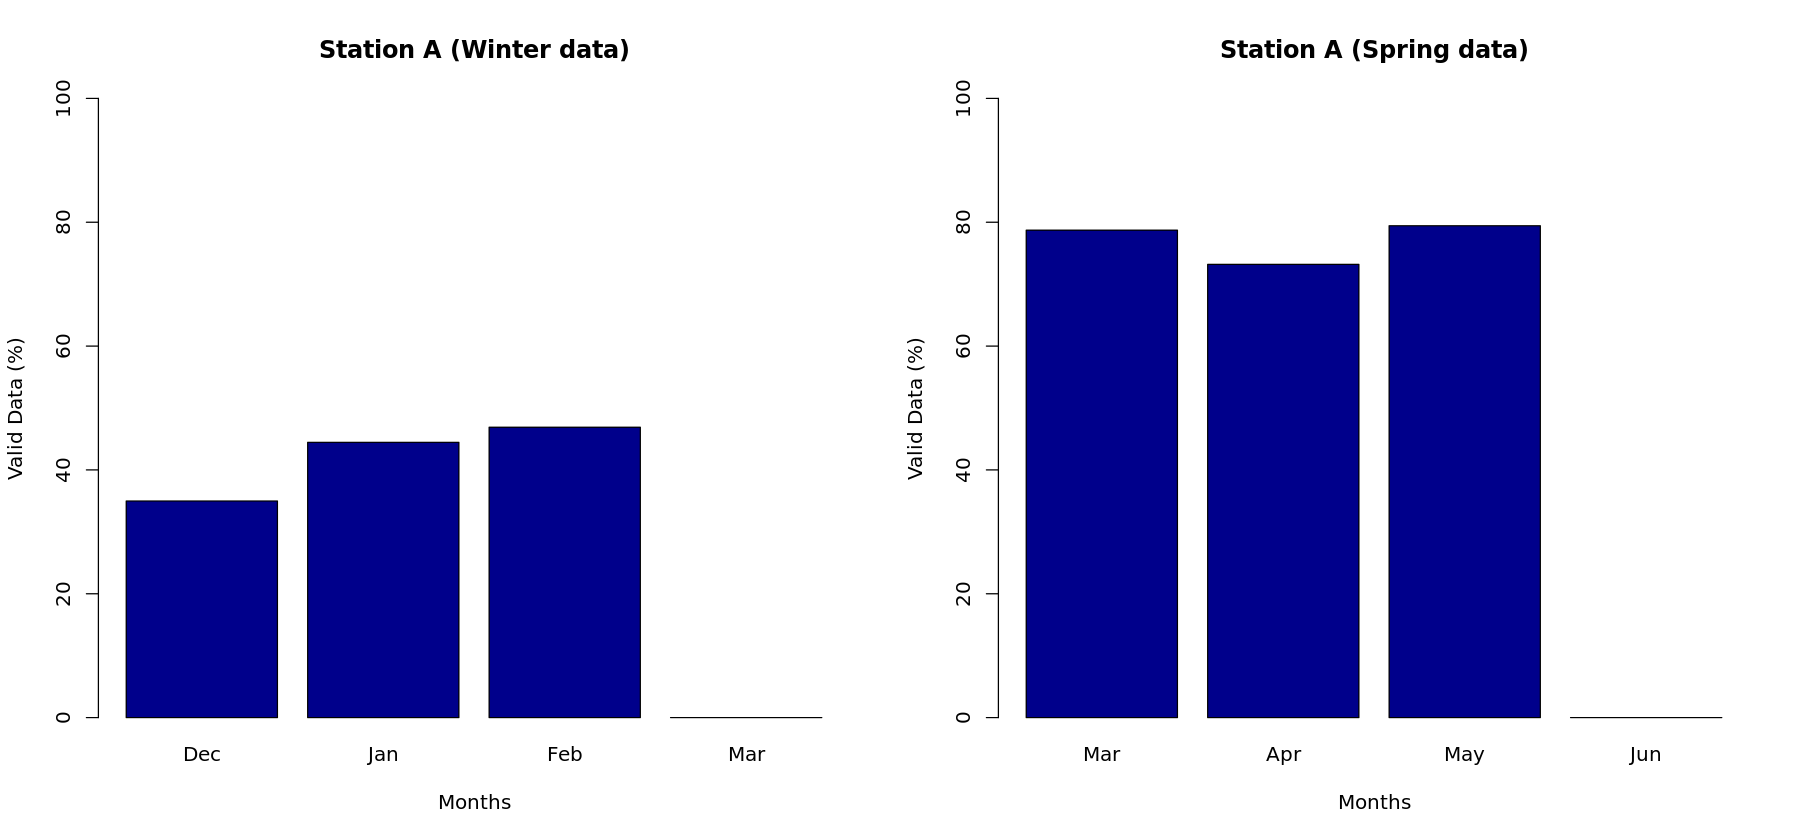

In [ ]:
PLOT <- function(monthly_perc, data=StationData, season='winter') {

if (season=='winter'){
args = c("Dec","Jan","Feb","Mar")}
else {
args = c("Mar","Apr","May","Jun")
}

barplot(monthly_perc, xlab = "Months", ylab = "Valid Data (%)",
              ylim = c(0,100), col = "darkblue",
              main = paste0("Station ", letter, " (",
              ifelse(season == 'spring', 'Spring data)', 'Winter data)')),
                        names.arg = args)
                        }
                        
                        
ConsistencyBarplot <- function(StationData, season) {

# DISPLAY THE DATA CONSISTENCY BY MONTH AS A BARPLOT ---------
# Compute the percentiles of valid data for each month
monPERC <- function(month, LenSD) {
            100*dim(dplyr::filter(StationData,(StationData$"Month" == month)))[1]/
            (mexp.data(month)*length(unique(StationData$"Year")) +
            sum(ifelse(month == 2 &
                    ((unique(StationData$"Year") %% 400)/4) == floor((unique(StationData$"Year") %% 400)/4),1, 0))) }


iPLOT = c()
if (season == 'winter') {
for (i in c(12, 1, 2, 3)) {
    iPLOT = c(iPLOT,monPERC(i))}
}
else {
for (i in c(3, 4, 5, 6)) {
    iPLOT = c(iPLOT, monPERC(i))}

}
# Create a function for graphics as barplot

PLOT(iPLOT, StationData, season)


# Save plot as PNG (also accepts PDF, JPG, etc...)
png(file = paste0(StationDataFile,"_DataConsistency.png"))
PLOT(iPLOT)
dev.off()

}


options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
ConsistencyBarplot(Winter_data, 'winter')
ConsistencyBarplot(Spring_data, 'spring')



In [ ]:
unique(Winter_15_16$Year)

[1] 2015 2016

png 
  2

png 
  2

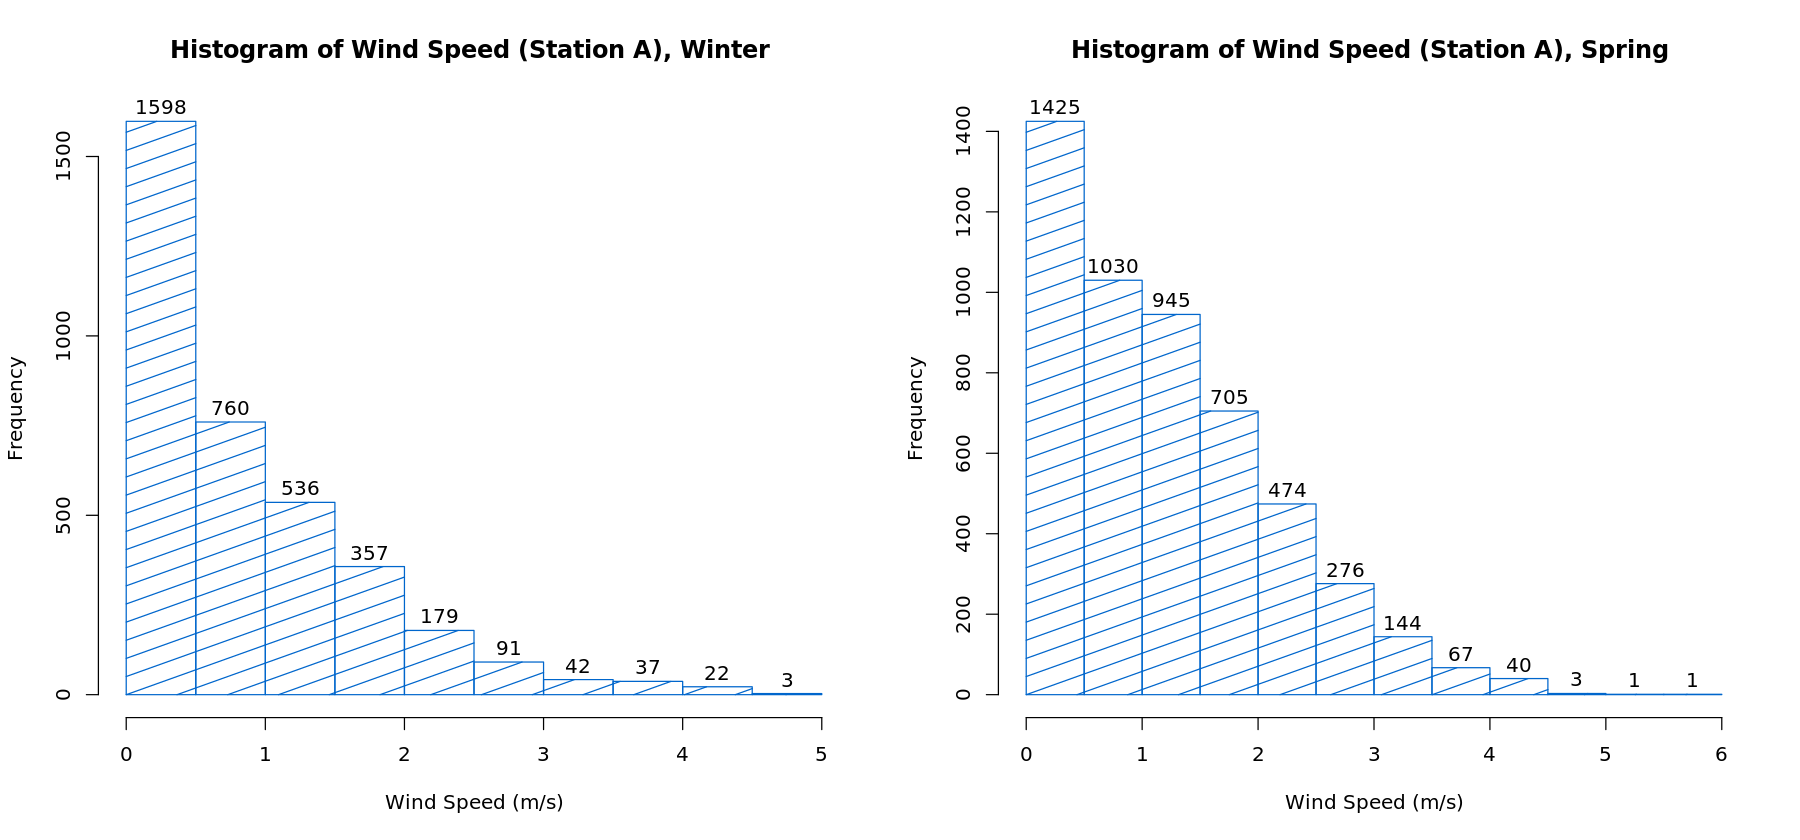

In [ ]:

# HISTOGRAM OF WIND SPEED =====================================
HistWS <- function(data, s='ciao') hist(data,
                         main = paste0("Histogram of Wind Speed (Station ", letter, "), ", s),
                         xlab = "Wind Speed (m/s)", ylab = "Frequency",
                         density = 10, angle = 45, col = "#0066CC",
                         labels = TRUE)

HistFinal <- function(StationData, s) {
    HistWS(StationData$"wndSpeed", s)

    # Save plot as PNG (also accepts PDF, JPG, etc...)
    png(file = paste0(StationDataFile,"_HistWS.png"))
    HistWS(StationData$"wndSpeed")
    dev.off()
    }

options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
HistFinal(Winter_data, "Winter ")
HistFinal(Spring_data, "Spring ")


In [ ]:
ExportLake <- function(StationData, c= "ciao") {

        StationDataFile <- strsplit("Data/", StationDataFile,".txt")
        # EXPORT TO LAKE FORMAT ======================================
        toLAKES <- cbind(# Station ID (flag)
                matrix(rep(99999,dim(StationData)[1]),
                dim(StationData)[1],1),
                # Date (year, month, day, hour)
                StationData[,2:5],
                # Rounded Wind Direction (°)
                round(StationData[,8],digits=0),
                # Rounded Wind Speed (knot = 1.94384 x m/s)
                round(1.94384*StationData[,7],digits=0)
                )
        colnames(toLAKES) <- c("StID","YYYY","MM","DD","HH","Dir","WS")
        rownames(toLAKES) <- c(1:dim(StationData)[1])
        StationData[1:6,]

        toLAKES[1:6,]

        write.table(toLAKES, paste0('LAKES/', 'Station_',letter,'_', c, "_LAKES.txt"),
        sep = " ", row.names=FALSE, col.names=FALSE)
        }


ExportLake(Winter_data, "winter")
ExportLake(Spring_data, "spring")


In [ ]:
ScatterPlot <- function(StationData ){
# SCATTER PLOT AND LINEAR REGRESSION =========================
# Get the linear regression formula as text
TextLM <- strsplit(as.character(lm(StationData$"wndSpeed"~StationData$"Hour")[1])," ")
TextLM <- paste0("y = ",round(as.numeric(gsub(",","",TextLM[[1]][3])),digits=2),
                 " + ",round(as.numeric(gsub(")","",TextLM[[1]][6])),digits=2),"x")

# Save plot as PNG (also accepts PDF, JPG, etc...)
png(file=paste0(StationDataFile,"_ScatterPlot.png"))
plot(StationData$"wndSpeed"~StationData$"Hour", main = "Scatter Plot (Station A)",
     xlab = "Hour", ylab = "Wind Speed (m/s)", pch = 20, col = "gray")
abline(lm(StationData$"wndSpeed"~StationData$"Hour"), col = "red")
text(4,6, TextLM, col = "red")
dev.off()}

ScatterPlot(Winter_data)


png 
  2

In [ ]:
help(lm)

png 
  2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65805a3-5683-44f7-87a1-3d0b16d3432c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>